# Training Deep Neural Network

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/smoke_detection_iot.csv')
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [3]:
df = data.drop(columns=['Unnamed: 0','UTC'])
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


<AxesSubplot:>

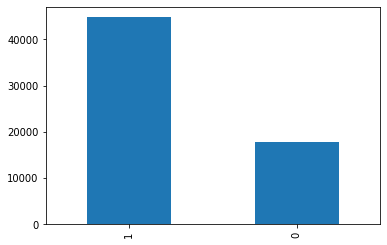

In [4]:
df['Fire Alarm'].value_counts().plot(kind='bar')

In [5]:
df_0 = df[df['Fire Alarm']==0]
df_1 = df[df['Fire Alarm']==1]
df_1 = df_1.sample(len(df_0))
df_samp = pd.concat([df_0,df_1])
df_samp = df_samp.sample(len(df_samp)).reset_index(drop=True)
df_samp

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,23.574,53.91,75,400,13108,19969,939.597,1.03,1.07,7.06,1.102,0.025,1876,0
1,-7.724,50.86,21,400,13258,20193,939.697,2.31,2.40,15.87,2.475,0.056,4869,1
2,-3.351,57.91,687,712,12776,19580,939.151,2.39,2.48,16.42,2.561,0.058,9918,1
3,20.777,51.99,1251,404,12911,19417,938.697,1.53,1.59,10.55,1.645,0.037,18939,1
4,11.530,56.86,14,400,12781,19777,939.816,0.29,0.32,1.95,0.337,0.027,509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35741,20.780,47.94,181,429,12776,20546,937.399,1.72,1.79,11.87,1.851,0.042,2945,0
35742,-9.241,42.94,72,400,12794,20648,937.487,1.75,1.82,12.05,1.879,0.042,1289,0
35743,20.382,22.91,13656,544,12740,19099,936.903,0.95,0.98,6.51,1.015,0.023,4445,0
35744,15.010,55.63,22,400,13097,19984,939.680,0.87,0.90,5.97,0.931,0.021,1405,0


<AxesSubplot:>

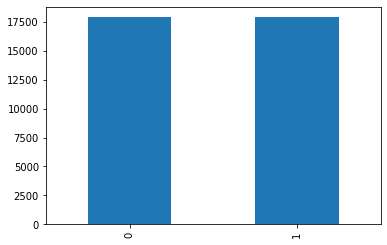

In [6]:
df_samp['Fire Alarm'].value_counts().plot(kind='bar')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_samp.drop(columns='Fire Alarm'), df_samp['Fire Alarm'], train_size=0.9, stratify=df_samp['Fire Alarm'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

In [8]:
X_train.shape

(25736, 13)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Penentuan jumlah neuron di hidden layer**

$𝑁_ℎ=\frac{𝑁𝑠}{(\alpha∗(𝑁𝑖+𝑁𝑜))}$

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.

Referensi: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
 


In [12]:
alp = 10
inp = X_train.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))

print (f'Jumlah neoron pada hidden layer: {hid}')
'''
    tf.keras.layers.Dense(inp, activation='relu', input_shape(inp,)),
    tf.keras.layers.Dense(hid, activation='relu),
    tf.keras.layers.Dense(out, activation='sigmoid')
])
'''

Jumlah neoron pada hidden layer: 183


"\n    tf.keras.layers.Dense(inp, activation='relu', input_shape(inp,)),\n    tf.keras.layers.Dense(hid, activation='relu),\n    tf.keras.layers.Dense(out, activation='sigmoid')\n])\n"

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(inp, input_shape=(X_train.shape[1],), kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(hid, activation='relu'))
model.add(tf.keras.layers.Dense(out, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 13)                182       
                                                                 
 dense_10 (Dense)            (None, 183)               2562      
                                                                 
 dense_11 (Dense)            (None, 1)                 184       
                                                                 
Total params: 2,928
Trainable params: 2,928
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics='accuracy')

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_val_scaled, y_val))

Epoch 1/50
1609/1609 [==============================] - 4s 2ms/step - loss: 0.3570 - accuracy: 0.9341 - val_loss: 0.1685 - val_accuracy: 0.9782
Epoch 2/50
1609/1609 [==============================] - 3s 2ms/step - loss: 0.1282 - accuracy: 0.9883 - val_loss: 0.1030 - val_accuracy: 0.9904
Epoch 3/50
1609/1609 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9922 - val_loss: 0.0767 - val_accuracy: 0.9933
Epoch 4/50
1609/1609 [==============================] - 3s 2ms/step - loss: 0.0687 - accuracy: 0.9939 - val_loss: 0.0625 - val_accuracy: 0.9952
Epoch 5/50
1609/1609 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.9943 - val_loss: 0.0530 - val_accuracy: 0.9936
Epoch 6/50
1609/1609 [==============================] - 3s 2ms/step - loss: 0.0502 - accuracy: 0.9951 - val_loss: 0.0478 - val_accuracy: 0.9925
Epoch 7/50
1609/1609 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9952 - val_loss: 0.0435 - val_accuracy:

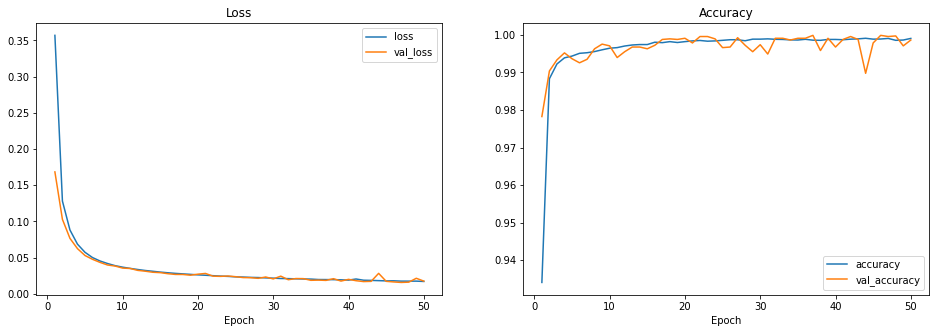

In [40]:
epoch = 50

fig,ax = plt.subplots(ncols=2, figsize=(16,5))
ax[0].plot(range(1,epoch+1), history.history['loss'], label='loss')
ax[0].plot(range(1,epoch+1), history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1), history.history['accuracy'], label='accuracy')
ax[1].plot(range(1,epoch+1), history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()